<a href="https://colab.research.google.com/github/Fukuchi8888/Kagawa/blob/main/KagawaKousyuu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ニューラルネットワークによるデータの分類**

## **1.データの収集**


**データ収集に必要なライブラリの読み込み**

---




In [ ]:
import numpy as np  #数学的処理を行うライブラリ
import pandas as pd  #データセットを扱うライブラリ
import matplotlib.pyplot as plt  #作図を行うライブラリ
import seaborn as sns  #特殊な作図を行うライブラリ
import sklearn   #機械学習のライブラリ
from sklearn.datasets import load_iris  #アヤメのデータセットのライブラリ

**アヤメのデータをインスタンス化**

---



In [ ]:
iris_data=load_iris()

In [ ]:
print(iris_data.data.shape)

(150, 4)


In [ ]:
print(iris_data.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
print(iris_data.target_names)
print(iris_data.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


**データを表にする**

---



In [ ]:
df_iris=pd.DataFrame(iris_data.data,columns=iris_data.feature_names)  #特徴量の表を作成する
df_iris['label']=iris_data.target  #作成した表にラベルの項目を追加する
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**特徴量と種類の相関関係を描写**

---



/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


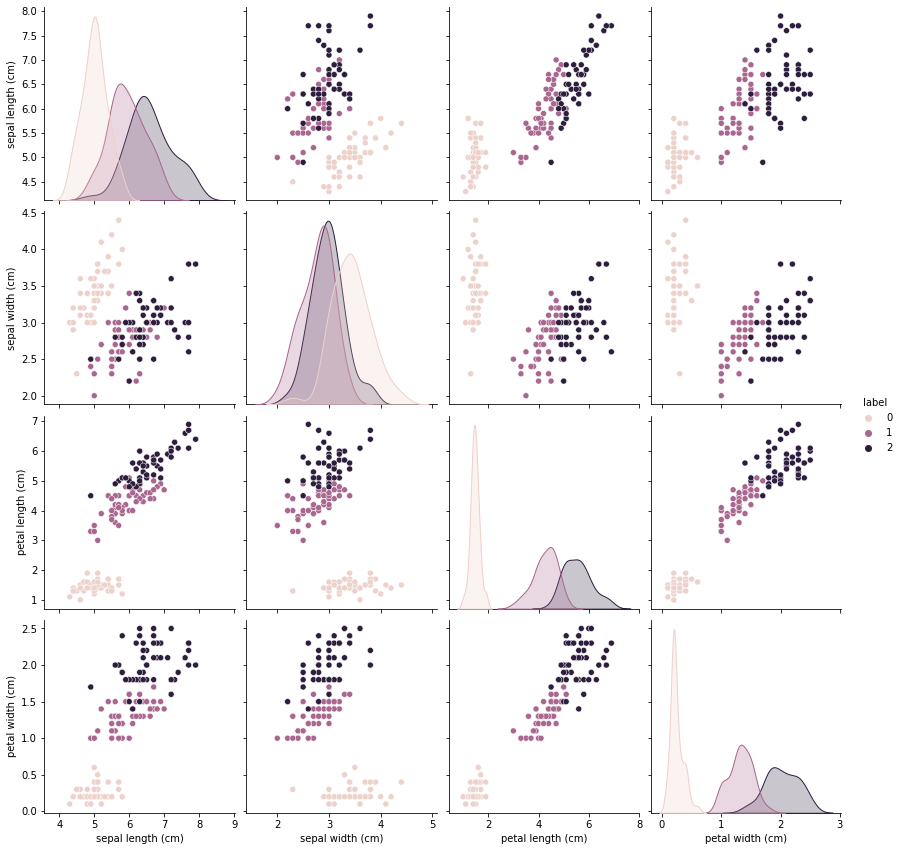

In [ ]:
sns.pairplot(df_iris,hue="label",size=3)

## **2.データの前処理**

**データの前処理に必要なライブラリの読み込み**

---



In [ ]:
from tensorflow.keras.utils import to_categorical  #one-hotベクトル化を行うライブラリ
from sklearn import preprocessing   #規格化を行うライブラリ
from sklearn.model_selection import train_test_split  #テストデータと練習データを分割するライブラリ

**規格化とone-hotベクトル化を行う**

---



In [ ]:
data_X=preprocessing.scale(iris_data.data)   #データを規格化する
data_y=to_categorical(iris_data.target)   #one-hotベクトル化する
print(data_X)
print(data_y)

[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -1.31544430e

**トレーニングデータとテストデータに分割する**

---



In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data_X,data_y, test_size=0.25, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(112, 4) (38, 4)
(112, 3) (38, 3)


## **3.モデルの作成**

**モデルの作成に必要なライブラリを読み込む**

---



In [ ]:
from keras import Sequential  #モデルを作るライブラリ
from keras.layers import Dense, Activation   #モデルの層を作るライブラリ
from keras.utils.vis_utils import plot_model  #作成したモデルを描写するライブラリ

**モデルの作成**

---



In [ ]:
#空のモデルを生成します
model1= Sequential()

#モデルに必要な層を足していきます
model1.add(Dense(10, input_dim=4, activation="relu"))
model1.add(Dense(10, activation="relu"))
model1.add(Dense(3, activation="softmax"))

#モデルのコンパイルを行います
model1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

**作成したモデルの描写**

---



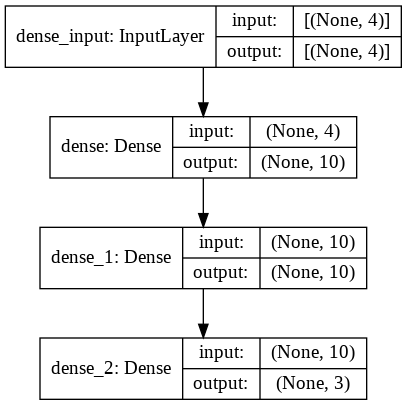

In [ ]:
plot_model(model1, show_shapes=True)

## **4.学習の実行**

**練習用データで学習を行う**

---



In [ ]:
history1=model1.fit(X_train,y_train,epochs=4,verbose=2)

Epoch 1/4
4/4 - 0s - loss: 0.9555 - accuracy: 0.6875
Epoch 2/4
4/4 - 0s - loss: 0.9310 - accuracy: 0.7143
Epoch 3/4
4/4 - 0s - loss: 0.9076 - accuracy: 0.7500
Epoch 4/4
4/4 - 0s - loss: 0.8837 - accuracy: 0.7679


**学習中の変化を描写する**

---



<function matplotlib.pyplot.show>

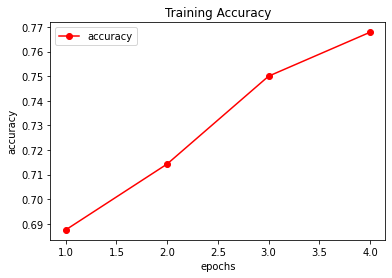

In [ ]:
#各epochごとのaccuracyの値を取り出す
accuracy=history1.history["accuracy"]
epochs=range(1,len(loss)+1)

#x軸にepoch, y軸にaccurasyを取るグラフを作成する
plt.plot(epochs, accuracy, color="red", label="accuracy",marker="o")
plt.title("Training Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show

<function matplotlib.pyplot.show>

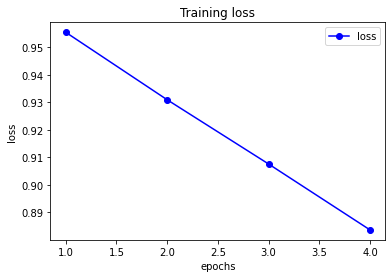

In [ ]:
#各epochごとのlossの値を取り出す
loss=history1.history["loss"]

plt.plot(epochs, loss, color="blue", label="loss",marker="o")
plt.title("Training loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show

## **5.モデルの評価**

**テストデータによるモデルの評価を行う**

---



In [ ]:
test_loss, test_accuracy=model1.evaluate(X_test,y_test,verbose=0)
print("loss : {0} \n accuracy : {1}".format(test_accuracy,test_loss))

loss : 0.7631579041481018 
 accuracy : 0.8582163453102112


## **6.モデルの再構築**

**同様の手順でより精度の高いモデルを作成する**

---



In [ ]:
model2=Sequential()
model2.add(Dense(100, input_dim=4, activation="relu"))
model2.add(Dense(100, activation="relu"))
model2.add(Dense(3, activation="softmax"))

model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

**model2による学習を行う**

---



In [ ]:
history2=model2.fit(X_train,y_train,epochs=100, verbose=2)

Epoch 1/100
4/4 - 1s - loss: 1.0499 - accuracy: 0.4911
Epoch 2/100
4/4 - 0s - loss: 0.9006 - accuracy: 0.7500
Epoch 3/100
4/4 - 0s - loss: 0.7824 - accuracy: 0.7768
Epoch 4/100
4/4 - 0s - loss: 0.6830 - accuracy: 0.8036
Epoch 5/100
4/4 - 0s - loss: 0.6033 - accuracy: 0.8304
Epoch 6/100
4/4 - 0s - loss: 0.5390 - accuracy: 0.8571
Epoch 7/100
4/4 - 0s - loss: 0.4858 - accuracy: 0.8661
Epoch 8/100
4/4 - 0s - loss: 0.4422 - accuracy: 0.8661
Epoch 9/100
4/4 - 0s - loss: 0.4061 - accuracy: 0.8661
Epoch 10/100
4/4 - 0s - loss: 0.3755 - accuracy: 0.8661
Epoch 11/100
4/4 - 0s - loss: 0.3467 - accuracy: 0.8661
Epoch 12/100
4/4 - 0s - loss: 0.3240 - accuracy: 0.8661
Epoch 13/100
4/4 - 0s - loss: 0.3025 - accuracy: 0.8750
Epoch 14/100
4/4 - 0s - loss: 0.2828 - accuracy: 0.8929
Epoch 15/100
4/4 - 0s - loss: 0.2659 - accuracy: 0.9018
Epoch 16/100
4/4 - 0s - loss: 0.2505 - accuracy: 0.9196
Epoch 17/100
4/4 - 0s - loss: 0.2342 - accuracy: 0.9196
Epoch 18/100
4/4 - 0s - loss: 0.2224 - accuracy: 0.9196
E

<function matplotlib.pyplot.show>

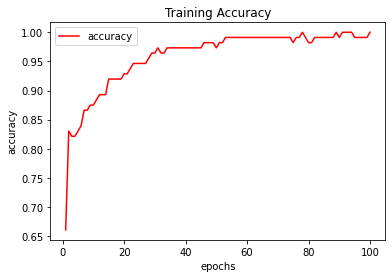

In [ ]:
accuracy2=history2.history["accuracy"]
loss2=history2.history["loss"]
epochs=range(1, len(loss2)+1)

plt.plot(epochs, accuracy2, color="red", label="accuracy")
plt.title("Training Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show

<function matplotlib.pyplot.show>

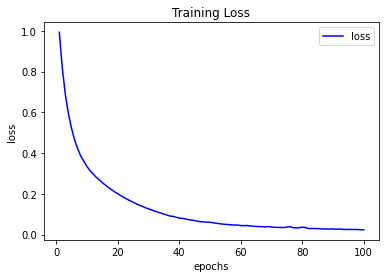

In [ ]:
plt.plot(epochs, loss2, color="blue", label="loss")
plt.title("Training Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show

In [ ]:
test_loss2,test_accuracy2=model2.evaluate(X_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0914 - accuracy: 0.9737


**model2の評価を行う**

---



In [ ]:
print("accuracy : {0} \n loss : {1}".format(test_accuracy2,test_loss2))

accuracy : 0.9736841917037964 
 loss : 0.0914449393749237


## **学習モデルの保存と読み込み**

In [ ]:
from tensorflow.keras.models import model_from_json #モデルの読み込みに必要なライブラリ

**作成したモデルと重みを保存する**

---



In [ ]:
model_json = model2.to_json() #model2をjsonという型に変換
with open('model2_iris.json', 'w') as file:
    file.write(model_json)#作成したモデルを保存

model2.save_weights('weights_model2.hdf5')#作成したモデルが学習した重みを保存

**自分のパソコンに読み込む**

---



In [ ]:
from google.colab import files

#ファイルを自分のパソコンに保存
files.download('model2_iris.json')
files.download('weights_model2.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**パソコンに保存されたモデルの読み込み**

---



In [ ]:
from google.colab import files
files.upload()

Saving iris_pra1.json to iris_pra1.json


{'iris_pra1.json': b'{"class_name": "Sequential", "config": {"name": "sequential_5", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 4], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_15_input"}}, {"class_name": "Dense", "config": {"name": "dense_15", "trainable": true, "batch_input_shape": [null, 4], "dtype": "float32", "units": 10, "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_16", "trainable": true, "dtype": "float32", "units": 10, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "ker

**ファイルのモデルを読み込む**

---



In [ ]:
with open('model2_iris.json', 'r') as file:
    model_json = file.read()
    model = model_from_json(model_json)#作成したモデルを読み込み

model.load_weights('weights_model2.hdf5')#作成したモデルが学習した重みを読み込み

**コンパイルをしてもう一度評価を行う**

---



In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
loss,accuracy = model.evaluate(X_train, y_train,verbose=0)
print("loss : {0} \n accuracy : {1}".format(loss,accuracy))

loss : 0.022103996947407722 
 accuracy : 1.0
